In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras import Model
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(size = X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(size = X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0, 1)
X_test_noisy = np.clip(X_test_noisy, 0, 1)

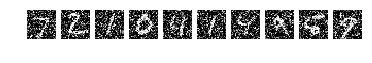

In [3]:
n = 10
plt.figure()
for i in range(n):
    plt.subplot(1, n, i + 1).axis('off')    # selecting the subplot 
    # and the .axis('off') part is for turning axis off
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()

In [4]:
input_img = Input(shape=(28, 28, 1))

X = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
X = MaxPooling2D((2, 2), padding='same')(X)
X = Conv2D(32, (3, 3), activation='relu', padding='same')(X)
X = MaxPooling2D((2, 2), padding='same')(X)

# at this point the representation is (7, 7, 32)

X = Conv2D(32, (3, 3), activation='relu', padding='same')(X)
X = UpSampling2D((2, 2))(X)
X = Conv2D(32, (3, 3), activation='relu', padding='same')(X)
X = UpSampling2D((2, 2))(X)
X = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(X)

In [5]:
autoencoder = Model(input_img, X)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [6]:
autoencoder.fit(X_train_noisy, X_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 51s 856us/step - loss: 0.1606 - val_loss: 0.1175
Epoch 2/100
60000/60000 [==============================] - 50s 827us/step - loss: 0.1142 - val_loss: 0.1094
Epoch 3/100
60000/60000 [==============================] - 50s 831us/step - loss: 0.1083 - val_loss: 0.1054
Epoch 4/100
60000/60000 [==============================] - 50s 828us/step - loss: 0.1049 - val_loss: 0.1029
Epoch 5/100
60000/60000 [==============================] - 50s 835us/step - loss: 0.1029 - val_loss: 0.1013
Epoch 6/100
60000/60000 [==============================] - 50s 835us/step - loss: 0.1017 - val_loss: 0.1002
Epoch 7/100
60000/60000 [==============================] - 49s 821us/step - loss: 0.1006 - val_loss: 0.0996
Epoch 8/100
60000/60000 [==============================] - 49s 820us/step - loss: 0.0998 - val_loss: 0.0986
Epoch 9/100
60000/60000 [==============================] - 49s 815us/step - loss: 0.09

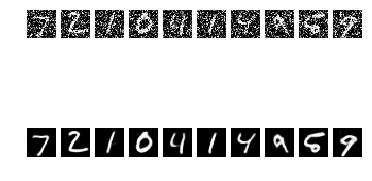

In [8]:
decoded_imgs = autoencoder.predict(X_test_noisy)

n = 10
plt.figure()
for i in range(n):
    plt.subplot(2, n, i + 1).axis('off')
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    plt.subplot(2, n, i + n + 1).axis('off')
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()

plt.show()